# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #print(city_weather["coord"])    
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
                        "City": city, 
                        "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | mclean
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | st. john's
Processing Record 7 of Set 1 | vernon
Processing Record 8 of Set 1 | paphos
Processing Record 9 of Set 1 | saipan
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | kissidougou
Processing Record 15 of Set 1 | boxtel
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | hanzhong
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | hap

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [6]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,12.37,82,79,0.61,NZ,1712469286
1,mclean,40.4834,-88.8334,7.24,79,0,5.66,US,1712469288
2,avarua,-21.2078,-159.7750,26.03,83,98,1.03,CK,1712469288
3,west island,-12.1568,96.8225,31.99,66,40,3.60,CC,1712469289
4,st. john's,47.5649,-52.7093,1.20,95,100,3.60,CA,1712469290
...,...,...,...,...,...,...,...,...,...
547,ketchikan,55.3422,-131.6461,4.26,81,75,4.12,US,1712469856
548,santiago tuxtla,18.4667,-95.3000,23.10,83,8,1.38,MX,1712469857
549,paso robles,35.6266,-120.6910,9.34,77,0,4.63,US,1712469858
550,sherbakul',54.6316,72.3963,1.09,36,12,4.74,RU,1712469859


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,12.37,82,79,0.61,NZ,1712469286
1,mclean,40.4834,-88.8334,7.24,79,0,5.66,US,1712469288
2,avarua,-21.2078,-159.7750,26.03,83,98,1.03,CK,1712469288
3,west island,-12.1568,96.8225,31.99,66,40,3.60,CC,1712469289
4,st. john's,47.5649,-52.7093,1.20,95,100,3.60,CA,1712469290


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

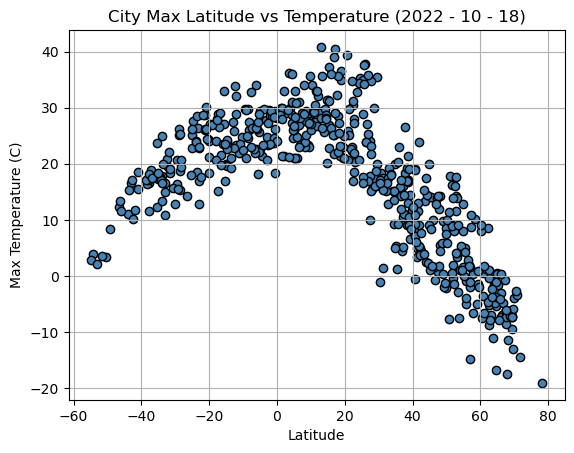

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"], 
            marker = "o", edgecolors= "black", facecolors = "steelblue", 
           )

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature (2022 - 10 - 18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

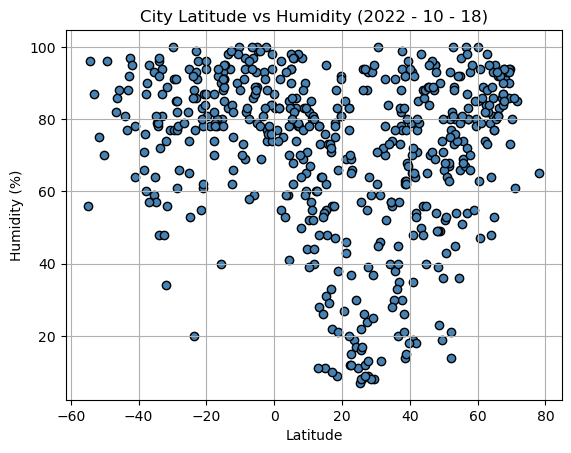

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"], 
            marker = "o", edgecolors= "black", facecolors = "steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2022 - 10 - 18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

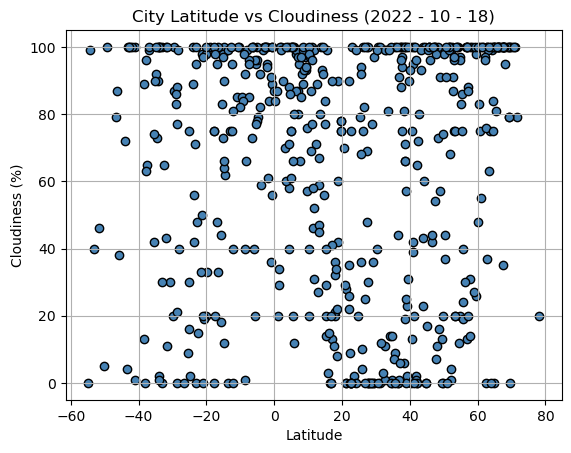

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"], 
            marker = "o", edgecolors= "black", facecolors = "steelblue")


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2022 - 10 - 18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

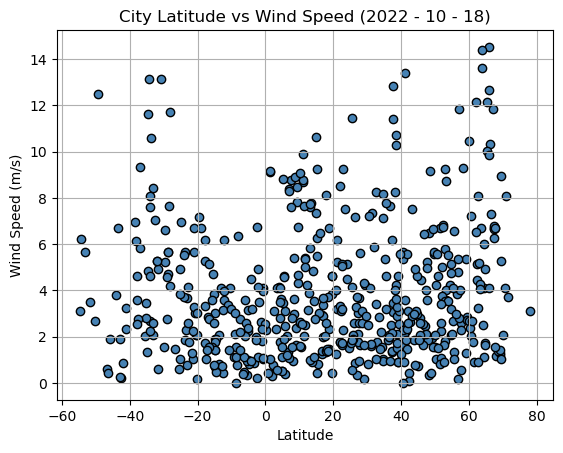

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"], 
            marker = "o", edgecolors= "black", facecolors = "steelblue")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2022 - 10 - 18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis_values, y_axis_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_values, y_axis_values)
    regress_values = x_axis_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    return (slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq)

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[ city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mclean,40.4834,-88.8334,7.24,79,0,5.66,US,1712469288
4,st. john's,47.5649,-52.7093,1.20,95,100,3.60,CA,1712469290
5,vernon,50.2581,-119.2691,8.20,52,37,1.03,CA,1712469291
6,paphos,34.7667,32.4167,19.88,56,0,1.03,CY,1712469291
7,saipan,15.1355,145.7010,31.39,62,20,9.26,MP,1712469206


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[ city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,12.37,82,79,0.61,NZ,1712469286
2,avarua,-21.2078,-159.7750,26.03,83,98,1.03,CK,1712469288
3,west island,-12.1568,96.8225,31.99,66,40,3.60,CC,1712469289
8,grytviken,-54.2811,-36.5092,3.95,96,99,6.22,GS,1712469294
9,port-aux-francais,-49.3500,70.2167,8.31,96,100,12.49,TF,1712469295


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7834969312474559


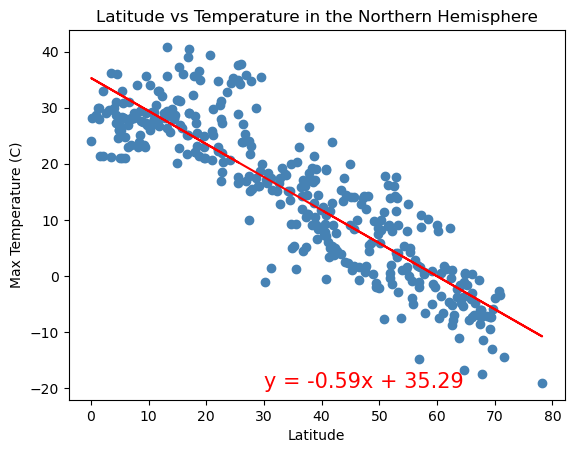

In [19]:
# Linear regression on Northern Hemisphere
#insert values for linear regression function:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq) = linear_reg(x_values, y_values)

#plot the scatter plot, pearson's r and regression line:
plt.scatter(x = x_values, y = y_values, marker = "o", facecolors = "steelblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (30,-20), fontsize = 15, color = "red")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs Temperature in the Northern Hemisphere")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.5570046586486241


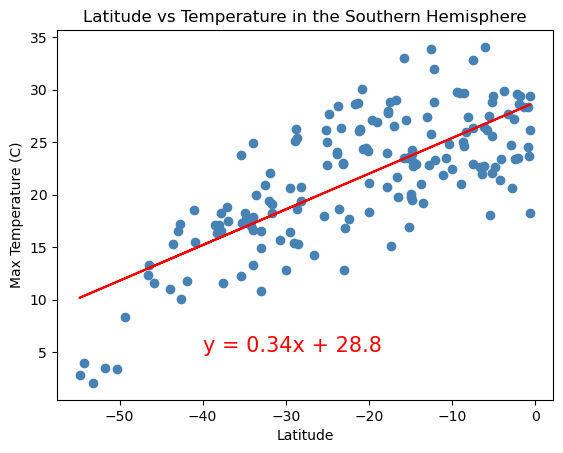

In [23]:
# Linear regression on Southern Hemisphere
#insert values for linear regression function:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq) = linear_reg(x_values, y_values)


plt.scatter(x = x_values, y = y_values, marker = "o", facecolors = "steelblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,5), fontsize = 15, color = "red")


# Incorporate the other graph properties
plt.title("Latitude vs Temperature in the Southern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There is a strong positive correlation between temperature and latitude in the northern hemisphere. This means, as the latitude increases, so does the temperature. As we move from the north pole to the equator, the temperature increases. There is a strong postitive correlation between latitude and temperature in the southern hemisphere as well. Similar to the northern hemisphere, as we move from the south pole towards the equator, the temperature increases. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.04128427542820724


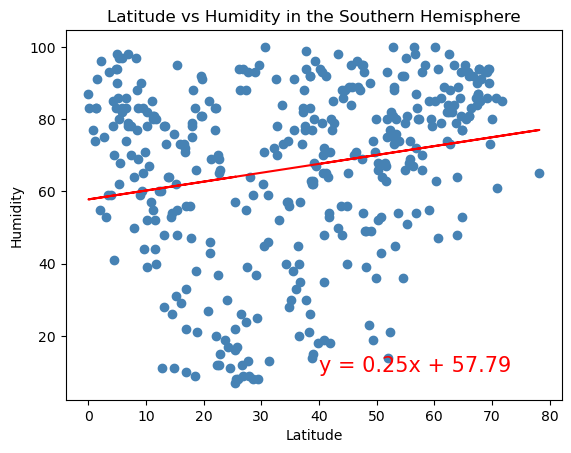

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq) = linear_reg(x_values, y_values)


plt.scatter(x = x_values, y = y_values, marker = "o", facecolors = "steelblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,10), fontsize = 15, color = "red")


# Incorporate the other graph properties
plt.title("Latitude vs Humidity in the Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.035092572474882844


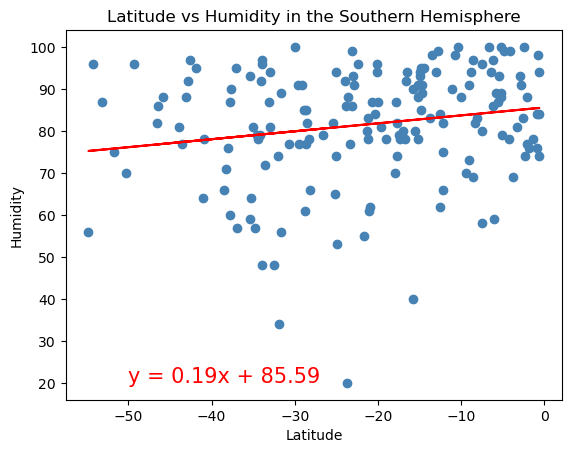

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq) = linear_reg(x_values, y_values)


plt.scatter(x = x_values, y = y_values, marker = "o", facecolors = "steelblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize = 15, color = "red")


# Incorporate the other graph properties
plt.title("Latitude vs Humidity in the Southern Hemisphere")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is a very poor correlation between humidity and latitude, while in the southern hemisphere, it is negligible, almost 0. That means, no matter which part of the globe you travel from towards the equator, there will not be any increase or decrease in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.010730522341482904


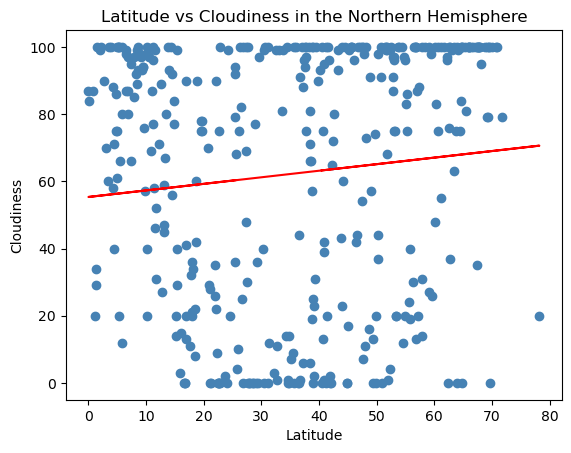

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq) = linear_reg(x_values, y_values)


plt.scatter(x = x_values, y = y_values, marker = "o", facecolors = "steelblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,5), fontsize = 15, color = "red")


# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in the Northern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.043226768745540274


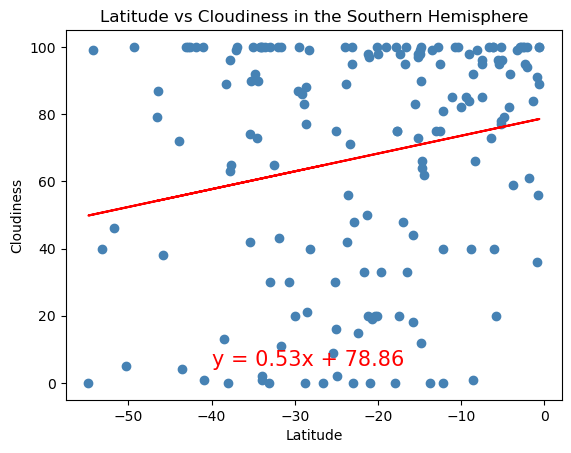

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq) = linear_reg(x_values, y_values)


plt.scatter(x = x_values, y = y_values, marker = "o", facecolors = "steelblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-40,5), fontsize = 15, color = "red")


# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness in the Southern Hemisphere")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** According to the regression values, it will get slightly cloudy as we move from either of the poles towards the equator. The relationship between cloudiness and latitide is slightly stronger in the southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.016006124614743076


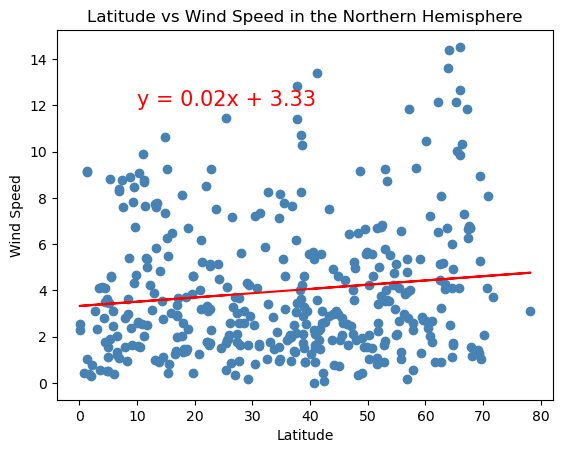

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq) = linear_reg(x_values, y_values)


plt.scatter(x = x_values, y = y_values, marker = "o", facecolors = "steelblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,12), fontsize = 15, color = "red")


# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed in the Northern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

The r-squared is: 0.11172037225709096


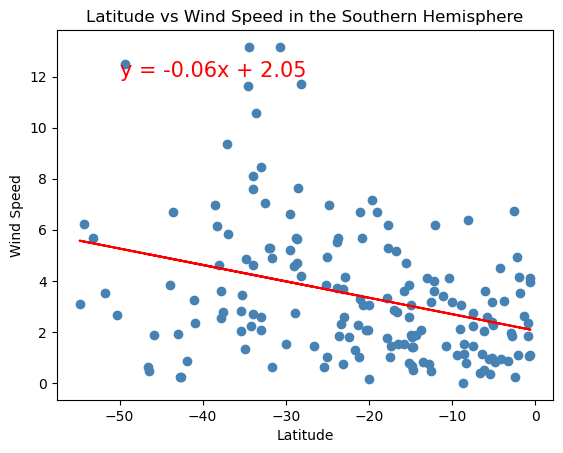

In [35]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr, regress_values, line_eq) = linear_reg(x_values, y_values)


plt.scatter(x = x_values, y = y_values, marker = "o", facecolors = "steelblue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,12), fontsize = 15, color = "red")


# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed in the Southern Hemisphere")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** While the wind speed increases as you move from the southern part of the globe towards the equator, this relationship does not seem to be as strong for the northern counterpart. 